
# Air Quality Notebook

With so many pollutants in the air, especially as we head into the annual fire season, the Air Quality Index (AQI) becomes something we check on daily. For many of us, this AQI map is all too familiar. 

<p align="center">
  <img src="images/AQImap.webp" width="" height="" align="center">
</p>

In this notebook we will look at data collected from PrupleAir, a company that manages a network of air quality sensors. The data from these sensors are then collected to create maps like the one displayed above that depicts an intuitive visualization of the air quality in a specific region. 

**Run the cell below to import all the dependencies needed for this notebook!**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import purpleair
import geopandas

<br>

# PurpleAir Data

Before we begin looking at data collected from PurpleAir sensors, lets first take a look at what a sensor is, and what it measures. 


> Below is a picture of a real PurpleAir Air Quality Sensor. These sensor can be mounted both indoors or outdoors, and it tracks airborne particulate matter(PM) in real time using PMSX003 laser counters. Particulate matter can include things like dust, smoke, dirt and any other organic or inorganic particles in the air. With multiple sensors mounted in a region, PurpleAir can create a relatively accurate measure of AQI throughout the day as the air quality changes. 

For more information on how sensors work, take a look at the official PurpleAir website [here](https://www2.purpleair.com/community/faq#hc-what-do-the-numbers-on-the-purpleair-map-mean-1)!

<p align="center">
  <img src="images/purpleair-sensor-pm2.5.webp" width="" height="" align="center">
</p>

In order to work with the data, we need to pull it into our workspace. Fortunately, PurpleAir has created an API that allows users to pull in and work with their AQI data. In the code cell below we will import the purpleair API and use it to create a dataframe of data from all 18,858 PurpleAir sensors!

**Run the code cell below!**

In [4]:
from purpleair.network import SensorList
p = SensorList()
df = p.to_dataframe(sensor_filter='all',
                    channel='parent')

Initialized 22,478 sensors!


**Run the cell below to display the sensor dataframe!**

The dataframe below contains all the sensor data as of the latest update. It contains data on everything from the geograohical latitude and longitude of the sensor to data on the last time that sensor measured airborne PM.

In [5]:
df

,parent,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,...,last_update_check,created,uptime,is_owner,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg
id,,,,,,,,,,,,,,,,,,,,,
14633,None,37.275561,-121.964134,Hazelwood canary,outside,0.33,65.0,18.333333,54.0,1008.59,...,None,None,None,False,1.15,4.89,9.08,18.01,21.89,15.43
25999,None,30.053808,-95.494643,Villages of Bridgestone AQI,outside,36.02,70.0,21.111111,70.0,1011.84,...,None,None,None,False,34.57,33.35,32.59,25.90,16.24,14.87
14091,None,37.883620,-122.070087,WC Hillside,outside,2.18,62.0,16.666667,58.0,1003.30,...,None,None,None,False,3.20,3.05,3.35,16.46,25.88,22.92
108226,None,38.573703,-121.439113,"""C"" Street Air Shelter",inside,4.68,78.0,25.555556,45.0,1015.84,...,None,None,None,False,4.56,4.36,4.06,3.95,4.75,5.46
49409,None,18.759182,99.017172,"""First's Place""",outside,39.93,85.0,29.444444,40.0,986.67,...,None,None,None,False,49.37,51.75,50.93,50.75,46.34,32.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64085,None,36.785883,127.157040,청룡동행정복지센터,outside,36.33,53.0,11.666667,46.0,1027.29,...,None,None,None,False,37.01,39.10,42.13,57.93,63.51,45.20
64995,None,36.691324,126.585255,한서대학교,outside,46.13,62.0,16.666667,34.0,1017.34,...,None,None,None,False,47.56,46.79,44.13,39.64,37.20,28.37
64093,None,36.710720,126.548390,해미읍성,outside,54.66,59.0,15.000000,44.0,1028.08,...,None,None,None,False,57.54,55.60,51.92,42.95,40.91,31.81


Looking at the dataframe above, we can check out the distribution of values for each column. For example, take a look at the locations that are in the list of the top ten highest temperatures. 

In [6]:
top_10_temps = df.sort_values("temp_f", ascending = False).head(10)

In [7]:
_deepnote_run_altair(top_10_temps, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"line","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"temp_f","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<br>

### Airborne Particulate Matter (PM) 2.5 
While many of the column names are relatively straightforward, the "name" column (which displays the set name of the particular sensor), the "location_type" column (which indicates where it is an indoor or outdoor sensor), etc., we would like to draw your attention to the "pm_2.5" column. 

>The "pm_2.5" column represents the count of airborne pm that is larger than 2.5um/dl, in otherwords, airborne particles that have a diameter of 2.5 micrometers or less. In high levels, PM 2.5 particles can reduce visibility and cause the air to appear hazy. Tracking PM 2.5 is important because prolonged exposure to high levels of PM 2.5 particles can cause adverse US Environmental Protection Agency (EPA) use to calculate the local Air Quality Index (AQI).

**Run the cell below to take a look at PM 2.5 levels of a specific sensor over time!**

In [8]:
## pull specific sensor data from a specific date / range of dates - Potentially have students look at AQI of a specific 
## area over a few weeks 

## data from 1000ft Montclair sensor from 7/12 - 7/18 (week of data)
from purpleair.sensor import Sensor
se = Sensor(20747)
MontclairSensor = se.parent.get_historical(weeks_to_get=1,
                              thingspeak_field='secondary')

MontclairSensor

,created_at,0.3um/dl,0.5um/dl,1.0um/dl,2.5um/dl,5.0um/dl,10.0um/dl,PM1.0 (CF=ATM) ug/m3,PM10 (CF=ATM) ug/m3
entry_id,,,,,,,,,
820554,2021-12-02 00:01:51+00:00,1569.10,435.24,56.34,2.76,0.46,0.42,7.59,10.97
820555,2021-12-02 00:03:51+00:00,1578.20,442.22,56.05,3.46,0.78,0.00,8.02,11.47
820556,2021-12-02 00:05:51+00:00,1563.21,433.67,55.23,3.44,0.91,0.56,7.16,10.79
820557,2021-12-02 00:07:51+00:00,1495.05,417.47,54.84,2.70,0.60,0.21,7.25,10.00
820558,2021-12-02 00:09:51+00:00,1488.90,405.18,51.58,5.30,1.50,0.43,7.28,11.17
...,...,...,...,...,...,...,...,...,...
825571,2021-12-08 23:51:27+00:00,316.58,84.83,12.47,0.73,0.00,0.00,0.80,1.25
825572,2021-12-08 23:53:27+00:00,345.88,94.16,10.86,1.28,0.24,0.00,0.81,1.72
825573,2021-12-08 23:55:27+00:00,795.16,217.69,24.45,1.36,0.43,0.43,3.43,5.40


The code cell above uses the purpleair API to pull a range of sensor data from a single sensor. In this case, we picked sensor named "1000ft Montclair". The "created_at" column contains information on the date and time the PM measures were taken. The timestamps show that the data was taken from the past week. Additionally, there is also data on PM paticules of different diameters such as 0.3, 0.5, 1.0, 2.5, 5.0 and 10.0.

<br>

Let's create a histogram of the PM 2.5 measure to see their distribution!

**Run the cell below to create the histogram.**

Text(0.5, 1.0, 'Montclair Sensor PM 2.5')

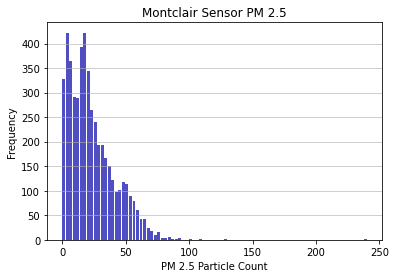

In [9]:
n, bins, patches = plt.hist(x=MontclairSensor["2.5um/dl"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('PM 2.5 Particle Count')
plt.ylabel('Frequency')
plt.title('Montclair Sensor PM 2.5')


The histogram above shows that many of PM 2.5 measures were most frequently somewhere around 10 particles, with very few occurances above 30 particles. While the histogram does show us a trend in the frequency of measures, we still have not clue how that translates to the API Index. 

### API Index
The API Index contains 6 categories that air quality can fall into. Each category contains a range of index values from 0 - 500 that is calculated from the regions PM 2.5 measure. The chart below is provided by the US Environmental Protection Agency (EPA) and shows the official AQI Index (these breakpoints were revised in 2012). 

For more information on how AQI Index is calculated, take a look at the AQI Index Factsheet provided by the EPA [here](https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf)!

<p align="center">
  <img src="images/AQI-category.png" width="" height="" align="center">
</p>

Now that we know how sesors work, what they measure and how AQI Indexes are calculated, let's see if we can create a visualization of AQI Indexes that are a little closer to home!

First, let's find a group of sensors that are near UC Berkeley. The code cell below does just that. We use a range of longitude and latitude coordinates to decide whether to include or exclude a sensor. 

**Run the cell below to display a dataset of about 600 sensors in and surrounding UC Berkeley!**

In [10]:
## UC Berkeley,CA - Lat: 37.871666 / Lon: -122.272781

berkeleyData = df.loc[(df["lat"] >= 37.8) & (df["lat"] <= 37.9) & (df["lon"] >= -122.3) & (df["lon"] <= -122.2)]
berkeleyData = berkeleyData[["lat", "lon", "name", "location_type", "pm_2.5", "temp_f", "humidity", "pressure"]]
berkeleyData

,lat,lon,name,location_type,pm_2.5,temp_f,humidity,pressure
id,,,,,,,,
20747,37.838977,-122.205489,1000ft Montclair,outside,1.69,56.0,79.0,980.12
81677,37.889085,-122.264327,"1044 Keith Ave, Berkeley",outside,1.71,59.0,65.0,996.06
79125,37.882941,-122.288017,1094 Tevlin St,inside,0.50,75.0,40.0,1014.05
77685,37.801872,-122.274582,10th and Washington,inside,0.80,77.0,37.0,1015.25
37971,37.883729,-122.290362,"1128 Key Route Blvd, Albany CA",outside,5.31,60.0,61.0,1014.56
...,...,...,...,...,...,...,...,...
26977,37.813427,-122.282483,Xanadu,inside,0.22,84.0,32.0,1015.70
56281,37.813500,-122.282971,Xanadu,outside,1.10,58.0,66.0,1016.17
62619,37.886177,-122.272443,Yolo,inside,0.06,90.0,22.0,1006.64


Now that we have a smaller subset of data to work with, the next step is to use the PM 2.5 measures to assign each sensor to an AQI Index Category and corresponding color. 

**Run the cell below to create a new column in the dataframe that indicates the sensors AQI Index.**

In [11]:
#creating a column that indicates the AQI code name
colorCode = []
for i in berkeleyData["pm_2.5"].to_list():
    if i <= 12.0:
        colorCode.append('good')
    elif (i < 12) & (i <=35.4):
        colorCode.append('moderate')
    elif (i < 35.5) & (i <=55.4):
        colorCode.append('unhealthy for sensitive groups')   
    elif (i < 55.5) & (i <=150.4):
        colorCode.append('unhealthy')
    elif (i < 150.5) & (i <=250.4):
        colorCode.append('very unhealthy')
    else:
        colorCode.append('hazardous')

berkeleyData['code'] = colorCode

Our last step is to use the longitude and latitude coordinates to map the relative location of the sensor with is corresponding AQI Index color!

In [12]:
#### **NOTE: Working on overlaying a map of the area over scatter plot below and adding legend** 

#dictionary for AQI code and corresponding color
colors = {'good':'green', 'moderate':'yellow', 'unhealthy for sensitive groups':'orange', 'unhealthy':'red', 'very unhealthy':'purple', 'hazardous':'maroon'}

#pull in shapefile of California Counties and covert to a coordinate reference system(crs)
cali = gpd.read_file('CA_Counties')
cali_convert = cali.to_crs(epsg=3857)


#plot converted data map 
ax = cali_convert.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')


#Scatter plot for pm_2.5 value of each sensor in the area
x, y = berkeleyData['lon'].values, berkeleyData['lat'].values
scatter = ax.scatter(x, y, marker='o', c=berkeleyData['code'].map(colors), cmap='plasma', s=70)
#ax.legend()

ax.set_ylim([37.8, 37.9])
ax.set_xlim([-122.3, -122.2])
ax.set_title('Berkeley AQI Index Category')
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
plt.show()

NameError: name 'gpd' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f19ace53-ffd9-4b3c-a807-6437cb6cda39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>